#Corporación Favorita Grocery Sales Forecasting
The objective is to predict future sales of items in Favorita grocery stores across different regions of Ecuador. So that Reliable predictions can be helpful to optimize inventory management, prevent stockouts, and improve promotion strategies.

# 1- Importing Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2- Data Retreival

In [2]:
# relative path to the csv file using the current working directory in Jupyter´
current_dir = os.getcwd()
# Adjust this path as needed to point to the parent directory
current_dir = os.path.dirname(current_dir)  

In [3]:
# Load the datasets using relative paths
df_stores = pd.read_csv(os.path.join(current_dir, 'Data_kaggel_&_Guayas/stores.csv'))
df_items = pd.read_csv(os.path.join(current_dir, 'Data_kaggel_&_Guayas/items.csv'))
df_holidays_event = pd.read_csv(os.path.join(current_dir, 'Data_kaggel_&_Guayas/holidays_events.csv'))
df_oil = pd.read_csv(os.path.join(current_dir, 'Data_kaggel_&_Guayas/oil.csv'))
df_transactions = pd.read_csv(os.path.join(current_dir, 'Data_kaggel_&_Guayas/transactions.csv'))
df_train_Guayas = pd.read_csv(os.path.join(current_dir, 'Data_kaggel_&_Guayas/train_Guayas_preprocessed.csv'))


In [4]:
df_train = df_train_Guayas.copy()
df_train.shape

(35069356, 11)

In [5]:
df_train.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg
0,24,105574,2013-01-02,18790.0,12.0,False,2013,1,2,2,NaN
1,24,105574,2013-01-03,59692.0,1.0,False,2013,1,3,3,NaN
2,24,105574,2013-01-04,99664.0,3.0,False,2013,1,4,4,NaN
3,24,105574,2013-01-05,140805.0,4.0,False,2013,1,5,5,NaN
4,24,105574,2013-01-06,182800.0,7.0,False,2013,1,6,6,NaN


## 3- Checking and Dealing Missing values

In [6]:
df_train.isnull().sum() #show the count of missing values

store_nbr                   0
item_nbr                    0
date                        0
id                   20323588
unit_sales                  0
onpromotion          20323588
year                        0
month                       0
day                         0
day_of_week                 0
unit_sales_7d_avg      124728
dtype: int64

In [7]:
#fill the nulls in unit sales_7d_avg with mean
df_train['unit_sales_7d_avg'].fillna(df_train['unit_sales_7d_avg'].mean(), inplace=True)


/var/folders/gq/3d_53n2d05n2_n592s2dd_mr0000gn/T/ipykernel_79448/3525891404.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['unit_sales_7d_avg'].fillna(df_train['unit_sales_7d_avg'].mean(), inplace=True)


In [8]:
df_train['onpromotion'].unique()

array([False, nan, True], dtype=object)

In [9]:
df_train.value_counts('onpromotion')

onpromotion
False    14066471
True       679297
Name: count, dtype: int64

In [10]:
df_train['onpromotion'].fillna(False, inplace=True) #nulls value replaced and column type changed
df_train['onpromotion']= df_train['onpromotion'].astype(bool)
df_train.isnull().sum()

/var/folders/gq/3d_53n2d05n2_n592s2dd_mr0000gn/T/ipykernel_79448/194577022.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['onpromotion'].fillna(False, inplace=True) #nulls value replaced and column type changed
/var/folders/gq/3d_53n2d05n2_n592s2dd_mr0000gn/T/ipykernel_79448/194577022.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('

store_nbr                   0
item_nbr                    0
date                        0
id                   20323588
unit_sales                  0
onpromotion                 0
year                        0
month                       0
day                         0
day_of_week                 0
unit_sales_7d_avg           0
dtype: int64

In [11]:
df_train['onpromotion'].unique()

array([False,  True])

In [12]:
df_train.value_counts('onpromotion')

onpromotion
False    34390059
True       679297
Name: count, dtype: int64

In [13]:
df_train.shape

(35069356, 11)

# 4- Exploratory Data Analysis

### 4.1- Total unit sales in Guayas over time

**Overall Trend**: There's a clear upward trend over time.

**Notable Features**:
Several dramatic drops to zero or near-zero sales (visible as sharp downward spikes)
These zero-sales periods appear to occur periodically throughout the timeline
High variability in daily sales, even within the same general time periods.


**Seasonality/Patterns**: While there's overall growth, The line shows a pattern of regular ups and downs, suggesting that sales volume fluctuates predictably over time. The regular drops to zero might indicate weekends, holidays, or business closure periods.

In [15]:
df_train.shape

(35069356, 11)

In [16]:
df_train['date'].min()


'2013-01-02'

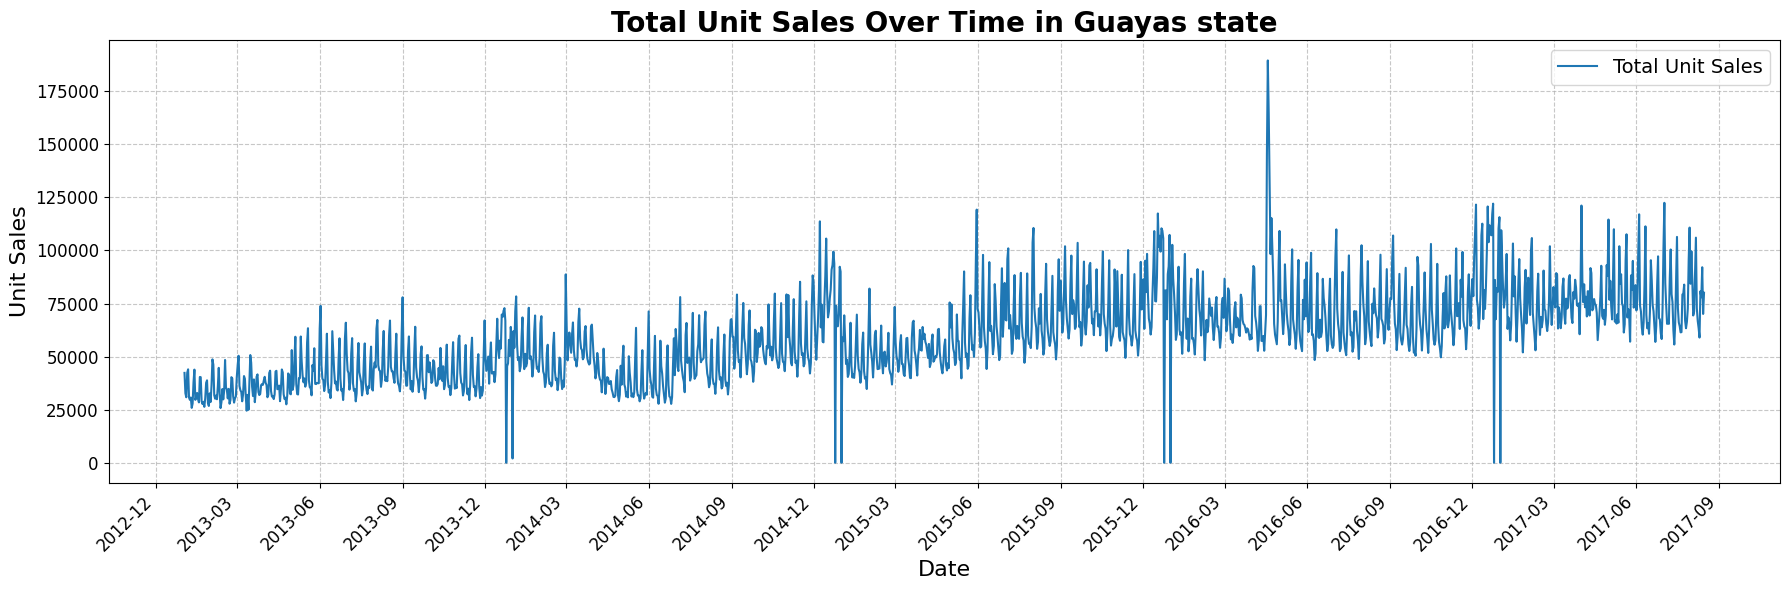

In [17]:
import matplotlib.dates as mdates  # Import the dates module

# Convert 'date' column to datetime objects
df_train['date'] = pd.to_datetime(df_train['date'])

# Assuming 'sales_over_time' is your pandas Series with date index
# Aggregating total sales by date
sales_over_time = df_train.groupby('date')['unit_sales'].sum()

# Plotting with fewer x-axis ticks and improved formatting
plt.figure(figsize=(18, 6))  # Increase figure width
plt.plot(sales_over_time.index, sales_over_time.values)
plt.title('Total Unit Sales Over Time in Guayas state', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Unit Sales', fontsize=16)

# Get the current axes
ax = plt.gca()

# Set the locator to show a tick every 3 months (adjust as needed)
locator = mdates.MonthLocator(interval=3)
ax.xaxis.set_major_locator(locator)

# Set the formatter to display date in the format 'YYYY-MM'
formatter = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(formatter)

plt.xticks(fontsize=12, rotation=45, ha='right')  # Still rotate labels for better fit
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(['Total Unit Sales'], fontsize=14)
plt.show()

### 4.2- Sales per month per year
From 2013 to 2016, sales volume consistently increased, with 2016 marking the peak performance, especially in the last quarter. However, 2017 saw a noticeable decline in sales across most months, with August 2017 being an anomaly of particularly low volume. Strong seasonal patterns include consistent high sales in December and robust performance during mid-year months (June-August), while January and February typically show weaker sales. This indicates a business that achieved significant growth until 2016 but encountered difficulties in 2017, despite capitalizing on strong year-end and mid-year seasonal trends.

Text(120.72222222222221, 0.5, 'Year')

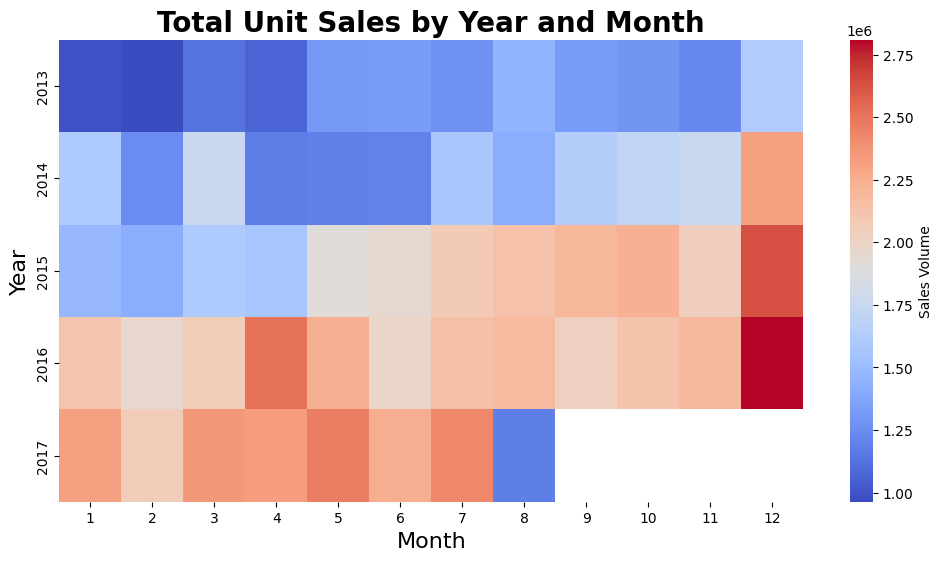

In [18]:
# Aggregating sales by year and month
sales_by_year_month = df_train.groupby(['year', 'month'])['unit_sales'].sum().unstack()

#Heat map for sales over month and years
plt.figure(figsize=(12,6))
sns.heatmap(sales_by_year_month, cmap='coolwarm', fmt='.0f', cbar_kws={'label': 'Sales Volume'})
plt.title('Total Unit Sales by Year and Month', fontsize=20, fontweight='bold')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Year', fontsize=16)




### 4.3- Sales per store
In Guayas state, store performance varies greatly, with unit sales ranging from 4.5 million to 17.5 million. Store 51 significantly leads , dwarfing other locations and outperforming the second-best by about 35%. The remaining stores fall into clear tiers: high performers (24, 28, 34), mid-tier (27, 36), and several underperformers (26, 29, 30, 32, 35).

<module 'matplotlib.pyplot' from '/Users/amna/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

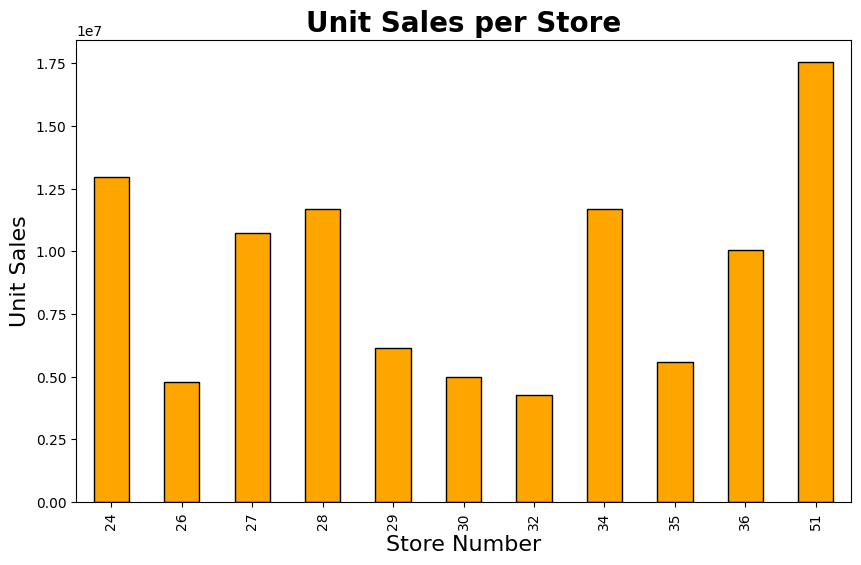

In [19]:
# unique stores in Guayas region
unique_stores = df_train['store_nbr'].unique()
unique_stores

# calculating unnit_sales per unique store
store_sales = df_train.groupby('store_nbr')['unit_sales'].sum()

# Plotting unit sales per store
plt.figure(figsize=(10,6))
store_sales.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Unit Sales per Store', fontsize=20, fontweight='bold')
plt.ylabel('Unit Sales', fontsize=16)
plt.xlabel('Store Number', fontsize=16)
plt

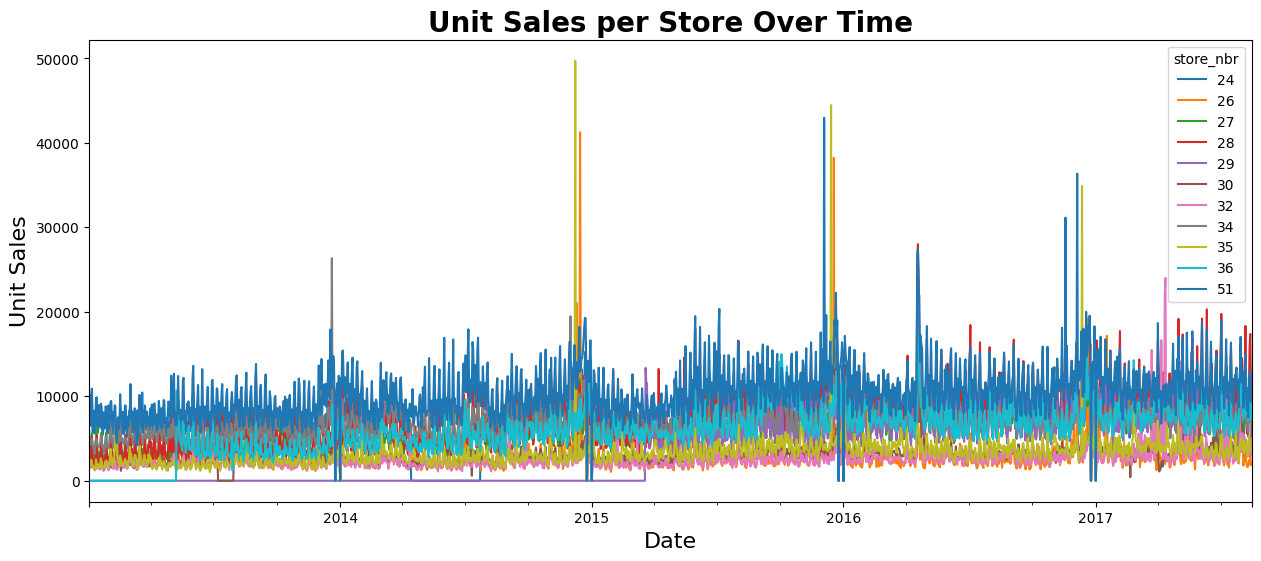

In [20]:
#store sales across the time span line plot
store_sales_over_time = df_train.groupby(['date', 'store_nbr'])['unit_sales'].sum().unstack()

#line plot of every stores against time
plt.figure(figsize=(15,6))
store_sales_over_time.plot(kind='line', ax=plt.gca())
plt.title('Unit Sales per Store Over Time', fontsize=20, fontweight='bold')
plt.ylabel('Unit Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

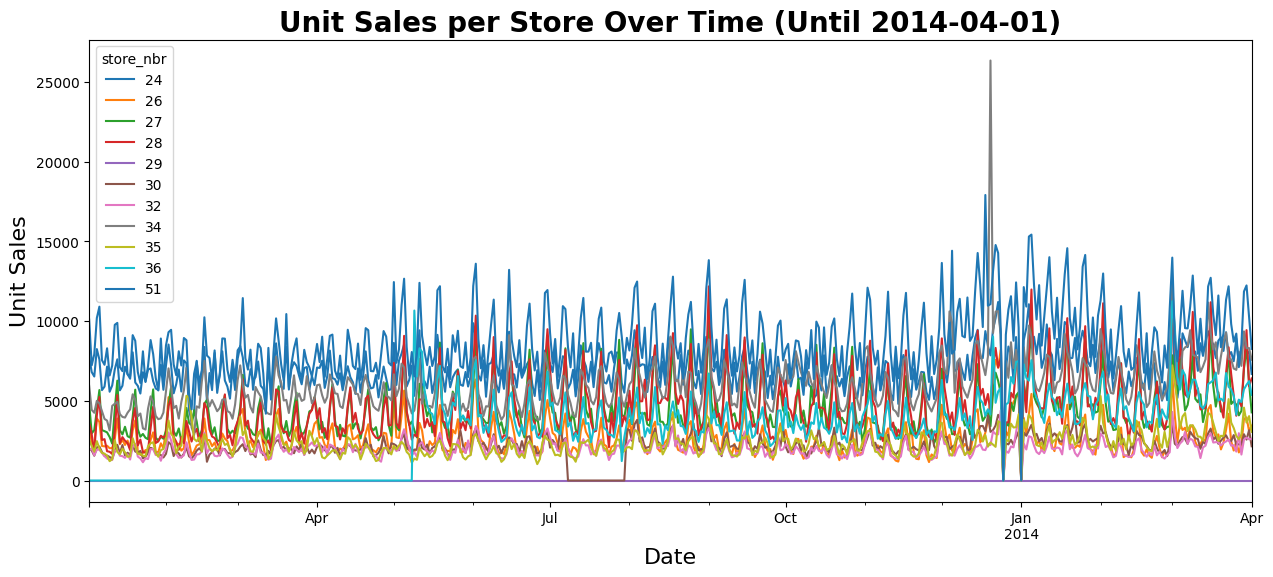

In [21]:

# Filter data until 2014-04-01
store_sales_over_time_filtered = store_sales_over_time.loc[:'2014-04-01']

#line plot of every stores against time
plt.figure(figsize=(15,6))
store_sales_over_time_filtered.plot(kind='line', ax=plt.gca())
plt.title('Unit Sales per Store Over Time (Until 2014-04-01)', fontsize=20, fontweight='bold')
plt.ylabel('Unit Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

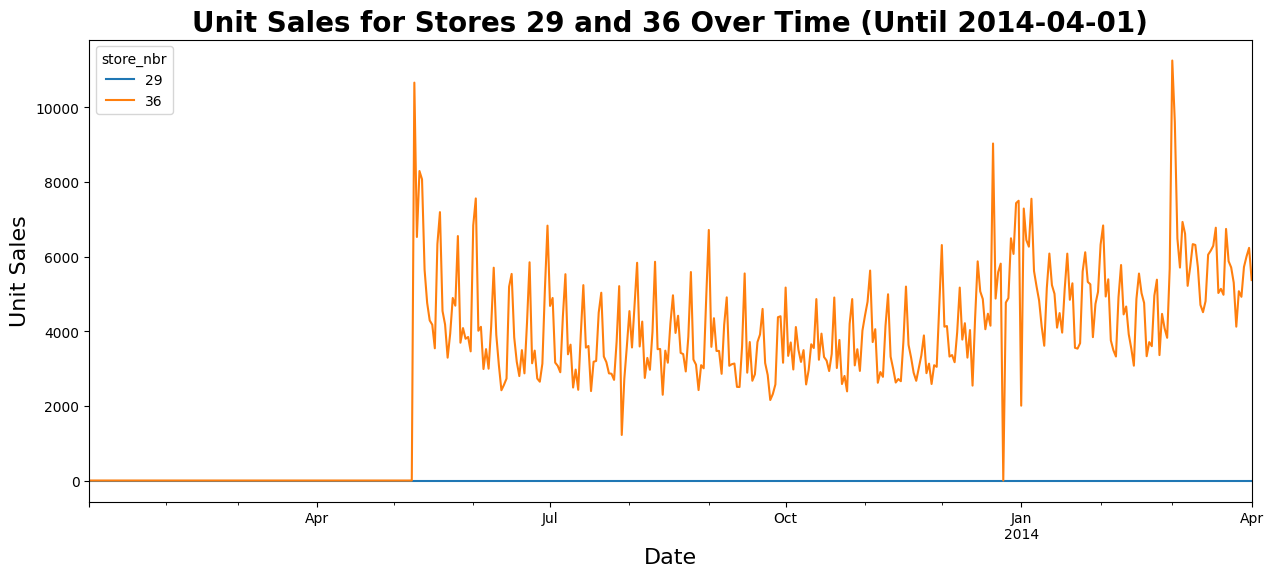

In [22]:
# Filter data until 2014-04-01 and for stores 29 and 36
store_sales_over_time_filtered_stores = store_sales_over_time.loc[:'2014-04-01', [29, 36]]

#line plot of selected stores against time
plt.figure(figsize=(15,6))
store_sales_over_time_filtered_stores.plot(kind='line', ax=plt.gca())
plt.title('Unit Sales for Stores 29 and 36 Over Time (Until 2014-04-01)', fontsize=20, fontweight='bold')
plt.ylabel('Unit Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

### 4.4- Sales across item families

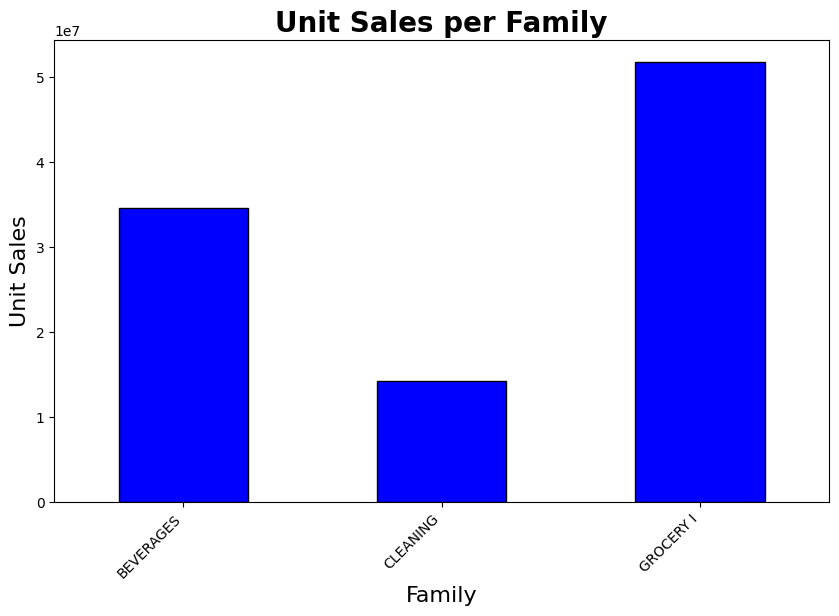

In [23]:
# unique item families
unique_families = df_items['family'].unique()
unique_families

# unit sales in individual families
family_sales = df_train.merge(df_items, on='item_nbr', how='left')

#group sales on family dolumn
family_sales_group = family_sales.groupby('family')['unit_sales'].sum()

#plot sales against families
plt.figure(figsize=(10,6))
family_sales_group.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Unit Sales per Family', fontsize=20, fontweight='bold')
plt.ylabel('Unit Sales', fontsize=16)
plt.xlabel('Family', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

### 4.5- Sales across items


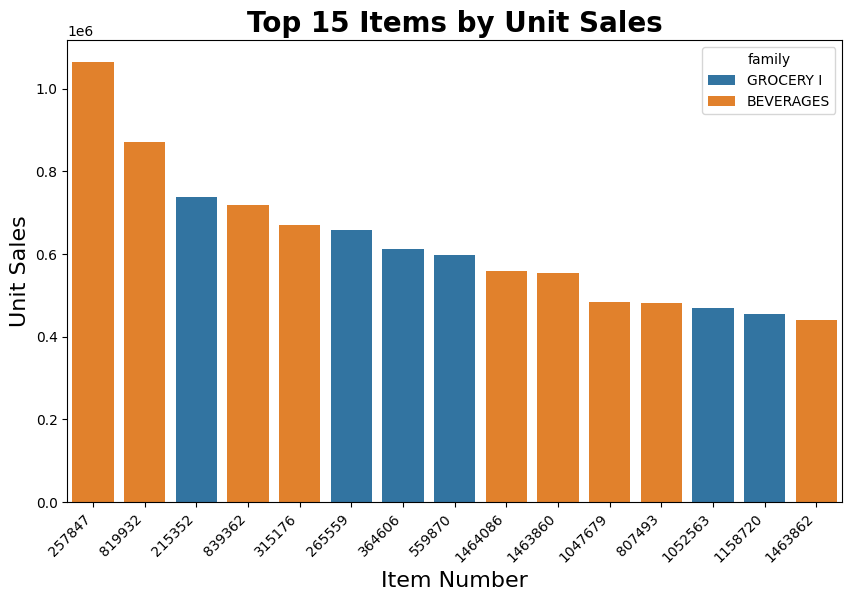

In [24]:
# group sales per item
item_sales = family_sales.groupby(['item_nbr', 'family'])['unit_sales'].sum().reset_index()

#top 15 items
top_15_items = item_sales.nlargest(15, 'unit_sales').sort_values(by='unit_sales', ascending=False)

#plot top 15 items sales
plt.figure(figsize=(10,6))

# Use Seaborn barplot to include hue
sns.barplot(x='item_nbr', y='unit_sales', hue='family', data=top_15_items, dodge=False, order=top_15_items['item_nbr'])

plt.title('Top 15 Items by Unit Sales', fontsize=20, fontweight='bold')
plt.ylabel('Unit Sales', fontsize=16)
plt.xlabel('Item Number', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()

### 4.6- Holiday and events impact on sales

In [25]:
df_holidays_event['date'] = pd.to_datetime(df_holidays_event['date'])
print("Holiday Range: from",df_holidays_event['date'].dt.date.min(), "till",df_holidays_event['date'].dt.date.max())


Holiday Range: from 2012-03-02 till 2017-12-26


In [26]:
df_train_greater_than_zero = df_train[df_train['unit_sales']>0]
df_train_greater_than_zero['date'] = pd.to_datetime(df_train_greater_than_zero['date'])
df_train_holiday = pd.merge(df_train_greater_than_zero, df_holidays_event, on='date', how='left')

df_train_holiday.head()

/var/folders/gq/3d_53n2d05n2_n592s2dd_mr0000gn/T/ipykernel_79448/4238959061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_greater_than_zero['date'] = pd.to_datetime(df_train_greater_than_zero['date'])


,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg,type,locale,locale_name,description,transferred
0,24,105574,2013-01-02,18790.0,12.0,False,2013,1,2,2,2.86605,NaN,NaN,NaN,NaN,NaN
1,24,105574,2013-01-03,59692.0,1.0,False,2013,1,3,3,2.86605,NaN,NaN,NaN,NaN,NaN
2,24,105574,2013-01-04,99664.0,3.0,False,2013,1,4,4,2.86605,NaN,NaN,NaN,NaN,NaN
3,24,105574,2013-01-05,140805.0,4.0,False,2013,1,5,5,2.86605,Work Day,National,Ecuador,Recupero puente Navidad,False
4,24,105574,2013-01-06,182800.0,7.0,False,2013,1,6,6,2.86605,NaN,NaN,NaN,NaN,NaN


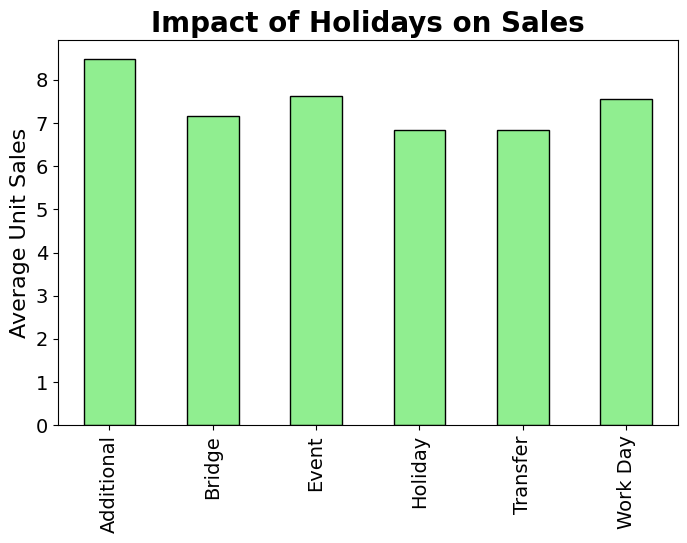

In [27]:
holiday_sales = df_train_holiday.groupby('type')['unit_sales'].mean()

# Plotting holiday impact
plt.figure(figsize=(8,5))
holiday_sales.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Impact of Holidays on Sales', fontsize=20, fontweight='bold')
plt.ylabel('Average Unit Sales', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



In [28]:
df_holidays_event['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

### 4.7- Analysing Perishable items

<Axes: xlabel='perishable'>

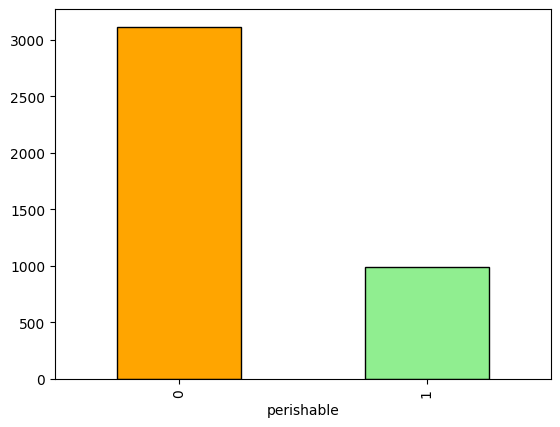

In [29]:
df_items['perishable'].value_counts()
df_items['perishable'].value_counts().plot(kind='bar', color=['orange', 'lightgreen'], edgecolor='black')

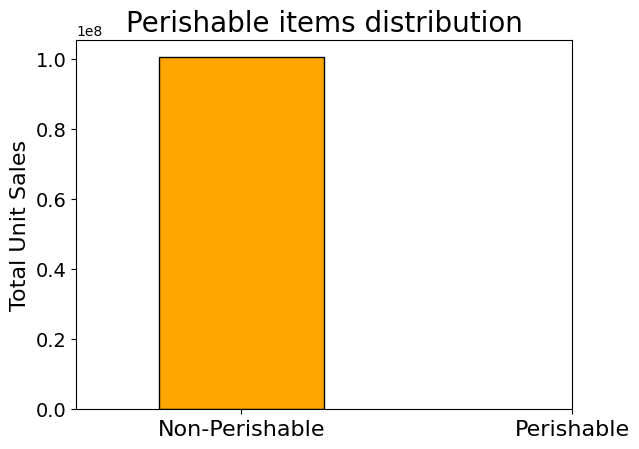

In [30]:

train_item_merge = df_train.merge(df_items, on ='item_nbr', how= 'left' )

train_item_merge['perishable'] = train_item_merge['perishable'].astype('bool')

perishable_item_grouped = train_item_merge.groupby('perishable')['unit_sales'].sum()

# Plotting perishable item count

perishable_item_grouped.plot(kind='bar', color=['orange', 'lightgreen'], edgecolor='black')
plt.title('Perishable items distribution', fontsize=20)
plt.ylabel('Total Unit Sales', fontsize=16)
plt.xlabel('')
plt.xticks(
    ticks=[0, 1],
    labels=['Non-Perishable', 'Perishable'],
    fontsize=16,
    rotation=0  # Keep x-axis labels horizontal
)
plt.yticks(fontsize=14)
plt.show()



### 4.8- Oil Prices and unit sales

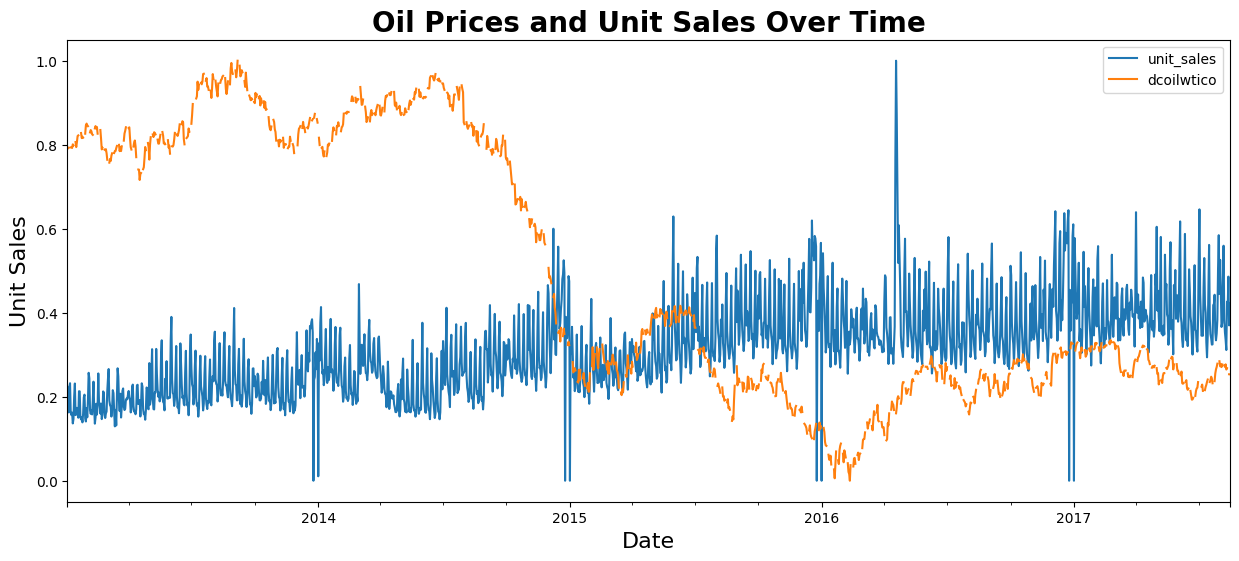

Correlation between dcoilwtico and unit_sales: -0.04452396880317273


In [32]:
df_oil.head()
df_oil['date'] = pd.to_datetime(df_oil['date'])
join_oil_sales = df_train.merge(df_oil, on='date', how='left')

# group dcoilwtico over time
oil_over_time = join_oil_sales.groupby('date').agg({'unit_sales': 'mean', 'dcoilwtico': 'mean'})

#descaled dcoilwtico to compare with unitsales
oil_over_time['dcoilwtico'] = (oil_over_time['dcoilwtico'] - oil_over_time['dcoilwtico'].min()) / (oil_over_time['dcoilwtico'].max() - oil_over_time['dcoilwtico'].min())

# descaled unit sales
oil_over_time['unit_sales'] = (oil_over_time['unit_sales'] - oil_over_time['unit_sales'].min()) / (oil_over_time['unit_sales'].max() - oil_over_time['unit_sales'].min())



#plot Oil prices and unit sales over time
plt.figure(figsize=(15,6))
oil_over_time.plot(kind='line', ax=plt.gca())
plt.title('Oil Prices and Unit Sales Over Time', fontsize=20, fontweight='bold')
plt.ylabel('Unit Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

#Find Correlation dcoilwtico and unit sales
correlation = join_oil_sales['dcoilwtico'].corr(join_oil_sales['unit_sales'])
print(f"Correlation between dcoilwtico and unit_sales: {correlation}")



# 5- Saving CSV

In [33]:
df_train.shape

(35069356, 11)

In [ ]:
#save_fileName = '/content/drive/MyDrive/Projects/Timeseries_project/data/train_Guayas_featureEngg.csv'
file_path = os.path.join(current_dir, 'Data_kaggel_&_Guayas/')
save_fileName = file_path + 'train_Guayas_featureEngg.csv'
df_train.to_csv(save_fileName, index=False)
print(f'File saved to {save_fileName}')